In [40]:
import pandas as pd

#Read the csv File
#Try Common Encodings: As a last resort, you can try common encodings like
#'utf-8', 'latin1', 'ISO-8859-1', etc., and see if any of them successfully decode the file without errors.

df = pd.read_csv('Bundesligadaten.txt', delimiter='\t', encoding='ISO-8859-1', header=None)

df.columns = ['date', 'time', 'localTeam', 'awayTeam', 'score', 'score-HT']


In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [42]:
#df['date'].isnull().any()

In [43]:
for column in ('date', 'time'):
     # Check if the column contains NaN values
    if df[column].isnull().any():
        # Fill NaN values with corresponding values from the last row using "forward fill"
        df[column] = df[column].ffill()

In [44]:

# Split the date Value to create a Day of the Week       
df['DoW'] = df['date'].str.split(',').str[0]
df['date'] = df['date'].str.split(',').str[1]

# Split the score
split_values = df['score'].str.split(':')
df['localTeam-Score'] = split_values.str[0].str[-1]
df['awayTeam-Score'] = split_values.str[1].str[0]

# Split the score to half time
split_values = df['score-HT'].str.split(':')
df['localTeam-SHT'] = split_values.str[0].str[-1]
df['awayTeam-SHT'] = split_values.str[1].str[0]


# Reorder columns
df = df[['DoW', 'date', 'time', 'localTeam', 'awayTeam', 'score', 'localTeam-Score', 'awayTeam-Score', 'score-HT', 'localTeam-SHT', 'awayTeam-SHT']]
df.head(1)

,DoW,date,time,localTeam,awayTeam,score,localTeam-Score,awayTeam-Score,score-HT,localTeam-SHT,awayTeam-SHT
0,Fr,18.08.2023,20:30,Werder Bremen,- FC Bayern München,0:4,0,4,(0:1),0,1


In [45]:
# Triming Columns
df['score-HT'] = df['score-HT'].str.removeprefix('(').str.removesuffix(')')
df['awayTeam'] = df['awayTeam'].str.removeprefix('- ')
df.head(1)

,DoW,date,time,localTeam,awayTeam,score,localTeam-Score,awayTeam-Score,score-HT,localTeam-SHT,awayTeam-SHT
0,Fr,18.08.2023,20:30,Werder Bremen,FC Bayern München,0:4,0,4,0:1,0,1


In [46]:
    
# Generate 'NewField' based on comparison of 'Field1' and 'Field2'
df['points-Local'] = df.apply(lambda row: 3 if row['localTeam-Score'] > row['awayTeam-Score'] else (1 if row['localTeam-Score'] == row['awayTeam-Score'] else 0), axis=1)
df['points-Away'] = df.apply(lambda row: 3 if row['awayTeam-Score'] > row['localTeam-Score'] else (1 if row['localTeam-Score'] == row['awayTeam-Score'] else 0), axis=1)

# Reorder columns
df = df[['DoW', 'date', 'time', 'localTeam', 'points-Local', 'awayTeam', 'points-Away', 'score', 'localTeam-Score', 'awayTeam-Score', 'score-HT', 'localTeam-SHT', 'awayTeam-SHT']]
df

,DoW,date,time,localTeam,points-Local,awayTeam,points-Away,score,localTeam-Score,awayTeam-Score,score-HT,localTeam-SHT,awayTeam-SHT
0,Fr,18.08.2023,20:30,Werder Bremen,0,FC Bayern München,3,0:4,0,4,0:1,0,1
1,Sa,19.08.2023,15:30,Bayer 04 Leverkusen,3,Rasenballsport Leipzig,0,3:2,3,2,2:1,2,1
2,Sa,19.08.2023,15:30,FC Augsburg,1,Bor. Mönchengladbach,1,4:4,4,4,3:3,3,3
3,Sa,19.08.2023,15:30,TSG Hoffenheim,0,SC Freiburg,3,1:2,1,2,0:2,0,2
4,Sa,19.08.2023,15:30,VfB Stuttgart,3,VfL Bochum,0,5:0,5,0,2:0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Sa,18.05.2024,15:30,Eintracht Frankfurt,0,Rasenballsport Leipzig,0,:,NaN,NaN,:,(,)
302,Sa,18.05.2024,15:30,TSG Hoffenheim,0,FC Bayern München,0,:,NaN,NaN,:,(,)
303,Sa,18.05.2024,15:30,VfB Stuttgart,0,Bor. Mönchengladbach,0,:,NaN,NaN,:,(,)
304,Sa,18.05.2024,15:30,VfL Wolfsburg,0,FSV Mainz 05,0,:,NaN,NaN,:,(,)


In [47]:
blTable_local = df.groupby('localTeam')['points-Local'].sum()
blTable_away = df.groupby('awayTeam')['points-Away'].sum()

In [48]:
concat_df = pd.concat([blTable_local, blTable_away])
concat_df = concat_df.to_frame()
concat_df.info()
concat_df.head(5)


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1. FC Heidenheim to Werder Bremen
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       36 non-null     int64
dtypes: int64(1)
memory usage: 576.0+ bytes


,0
1. FC Heidenheim,19
1. FC Köln,9
1. FC Union Berlin,20
Bayer 04 Leverkusen,38
Bor. Mönchengladbach,19


In [49]:
#Shape is a tuple (attribute) and not a method, so it can't be call
print(concat_df.shape)

concat_df = concat_df.groupby(concat_df.index).sum()
concat_df


(36, 1)


,0
1. FC Heidenheim,30
1. FC Köln,19
1. FC Union Berlin,29
Bayer 04 Leverkusen,73
Bor. Mönchengladbach,28
Borussia Dortmund,53
Darmstadt 98,14
Eintracht Frankfurt,41
FC Augsburg,36
FC Bayern München,60


In [50]:
concat_df.reset_index(inplace=True)
concat_df = concat_df.rename(columns={'index': 'Team'})
concat_df = concat_df.rename(columns={0: 'Points' })
print(concat_df.columns)
concat_df

Index(['Team', 'Points'], dtype='object')


,Team,Points
0,1. FC Heidenheim,30
1,1. FC Köln,19
2,1. FC Union Berlin,29
3,Bayer 04 Leverkusen,73
4,Bor. Mönchengladbach,28
5,Borussia Dortmund,53
6,Darmstadt 98,14
7,Eintracht Frankfurt,41
8,FC Augsburg,36
9,FC Bayern München,60


In [51]:
pivot_df = concat_df.pivot_table(index='Team', values='Points', aggfunc='sum').reset_index()
print(pivot_df)

                      Team  Points
0         1. FC Heidenheim      30
1               1. FC Köln      19
2       1. FC Union Berlin      29
3      Bayer 04 Leverkusen      73
4     Bor. Mönchengladbach      28
5        Borussia Dortmund      53
6             Darmstadt 98      14
7      Eintracht Frankfurt      41
8              FC Augsburg      36
9        FC Bayern München      60
10            FSV Mainz 05      20
11  Rasenballsport Leipzig      50
12             SC Freiburg      36
13          TSG Hoffenheim      33
14           VfB Stuttgart      57
15              VfL Bochum      26
16           VfL Wolfsburg      28
17           Werder Bremen      30


In [52]:
# merge_df = pd.merge(blTable_local[['localTeam', 'points-Local']], blTable_away, how='inner', left_on='localTeam', right_on='awayTeam')
merge_df = pd.merge(blTable_local, blTable_away, how='inner', left_on='localTeam', right_on='awayTeam')
merge_df

,points-Local,points-Away
0,19,11
1,9,10
2,20,9
3,38,35
4,19,9
5,26,27
6,6,8
7,24,17
8,21,15
9,34,26


In [53]:
#######Deprecated since problem fixed in concatenation##########
# # # Remove duplicate entries for the same team
# # unique_teams_df = concat_df.drop_duplicates(subset=['Team'])

# # # Group by the 'Team' column and sum the 'Points'
# # unique_teams_df['Team']= unique_teams_df['Team'].str.strip()

In [54]:
bl_positionsTB = concat_df.groupby('Team')['Points'].sum().reset_index().sort_values('Points', ascending=False)
bl_positionsTB

,Team,Points
3,Bayer 04 Leverkusen,73
9,FC Bayern München,60
14,VfB Stuttgart,57
5,Borussia Dortmund,53
11,Rasenballsport Leipzig,50
7,Eintracht Frankfurt,41
12,SC Freiburg,36
8,FC Augsburg,36
13,TSG Hoffenheim,33
0,1. FC Heidenheim,30


In [55]:
concat_df.groupby('Team')['Points'].sum().reset_index().sort_values('Points', ascending=False)


,Team,Points
3,Bayer 04 Leverkusen,73
9,FC Bayern München,60
14,VfB Stuttgart,57
5,Borussia Dortmund,53
11,Rasenballsport Leipzig,50
7,Eintracht Frankfurt,41
12,SC Freiburg,36
8,FC Augsburg,36
13,TSG Hoffenheim,33
0,1. FC Heidenheim,30


In [56]:
# blTable_local.merge(blTable_away, left_on='lkey')
points_table_df = pd.concat([blTable_local, blTable_away], axis=1)

In [57]:
# points_table = points_table_df.groupby['points-Away'].sum()
points_table_df.index.name = 'Team'
points_table_df

,points-Local,points-Away
Team,,
1. FC Heidenheim,19,11
1. FC Köln,9,10
1. FC Union Berlin,20,9
Bayer 04 Leverkusen,38,35
Bor. Mönchengladbach,19,9
Borussia Dortmund,26,27
Darmstadt 98,6,8
Eintracht Frankfurt,24,17
FC Augsburg,21,15


In [58]:
# # Fill NaN values with 0
# points_table_df.fillna(0, inplace=True)

# Sum points across both 'points-Local' and 'points-Away' columns
points_table_df['Total Points'] = points_table_df['points-Local'] + points_table_df['points-Away']

# Reset index to make 'Team' a regular column
points_table_df.reset_index(inplace=True)
points_table_df


,Team,points-Local,points-Away,Total Points
0,1. FC Heidenheim,19,11,30
1,1. FC Köln,9,10,19
2,1. FC Union Berlin,20,9,29
3,Bayer 04 Leverkusen,38,35,73
4,Bor. Mönchengladbach,19,9,28
5,Borussia Dortmund,26,27,53
6,Darmstadt 98,6,8,14
7,Eintracht Frankfurt,24,17,41
8,FC Augsburg,21,15,36
9,FC Bayern München,34,26,60


In [59]:
bundesliga_Table_df = points_table_df.groupby('Team')['Total Points'].sum().astype(int).to_frame()
# bundesliga_Table.info()
# # If you want to reset the index and make 'Team' a regular column, you can use the reset_index() method:
bundesliga_Table_df.reset_index(inplace=True)

bundesliga_Table_df.sort_values(by=['Total Points'], ascending=False)
bundesliga_Table_df['Team'].unique()
# bundesliga_Table_df = bundesliga_Table_df.groupby('Team')['Total Points'].sum()
# bundesliga_Table_df

array(['1. FC Heidenheim', '1. FC Köln', '1. FC Union Berlin',
       'Bayer 04 Leverkusen', 'Bor. Mönchengladbach', 'Borussia Dortmund',
       'Darmstadt 98', 'Eintracht Frankfurt', 'FC Augsburg',
       'FC Bayern München', 'FSV Mainz 05', 'Rasenballsport Leipzig',
       'SC Freiburg', 'TSG Hoffenheim', 'VfB Stuttgart', 'VfL Bochum',
       'VfL Wolfsburg', 'Werder Bremen'], dtype=object)

In [60]:
bundesliga_Table_df['Team']


0           1. FC Heidenheim
1                 1. FC Köln
2         1. FC Union Berlin
3        Bayer 04 Leverkusen
4       Bor. Mönchengladbach
5          Borussia Dortmund
6               Darmstadt 98
7        Eintracht Frankfurt
8                FC Augsburg
9          FC Bayern München
10              FSV Mainz 05
11    Rasenballsport Leipzig
12               SC Freiburg
13            TSG Hoffenheim
14             VfB Stuttgart
15                VfL Bochum
16             VfL Wolfsburg
17             Werder Bremen
Name: Team, dtype: object

Plotting Session

<Axes: >

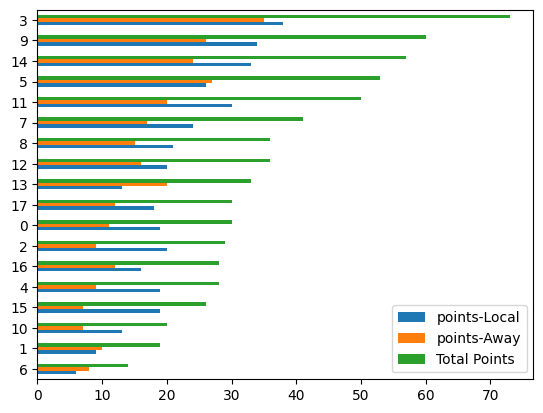

In [61]:
points_table_df = points_table_df.sort_values(by='Total Points')
points_table_df.plot.barh()

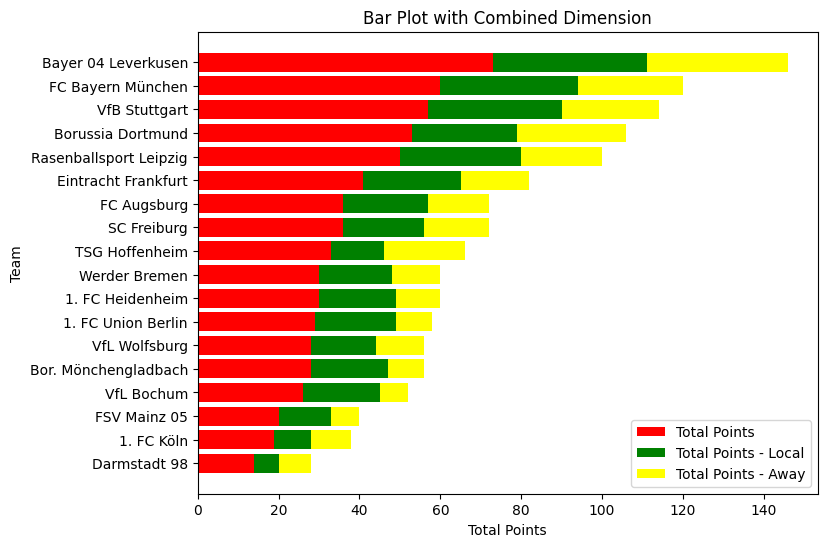

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.barh(points_table_df['Team'], points_table_df['Total Points'],  color='red', label='Total Points')
plt.barh(points_table_df['Team'], points_table_df['points-Local'],  color='green', label='Total Points - Local', left=points_table_df['Total Points'])
plt.barh(points_table_df['Team'], points_table_df['points-Away'],  color='Yellow', label='Total Points - Away', left=points_table_df['Total Points'] + points_table_df['points-Local'])
# plt.barh(df['Combined'], df['Value1'], color='blue', label='Value1')
# plt.barh(df['Combined'], df['Value2'], color='red', label='Value2', left=df['Value1'])
plt.xlabel('Total Points')
plt.ylabel('Team')
plt.title('Bar Plot with Combined Dimension')
plt.legend()
plt.show()

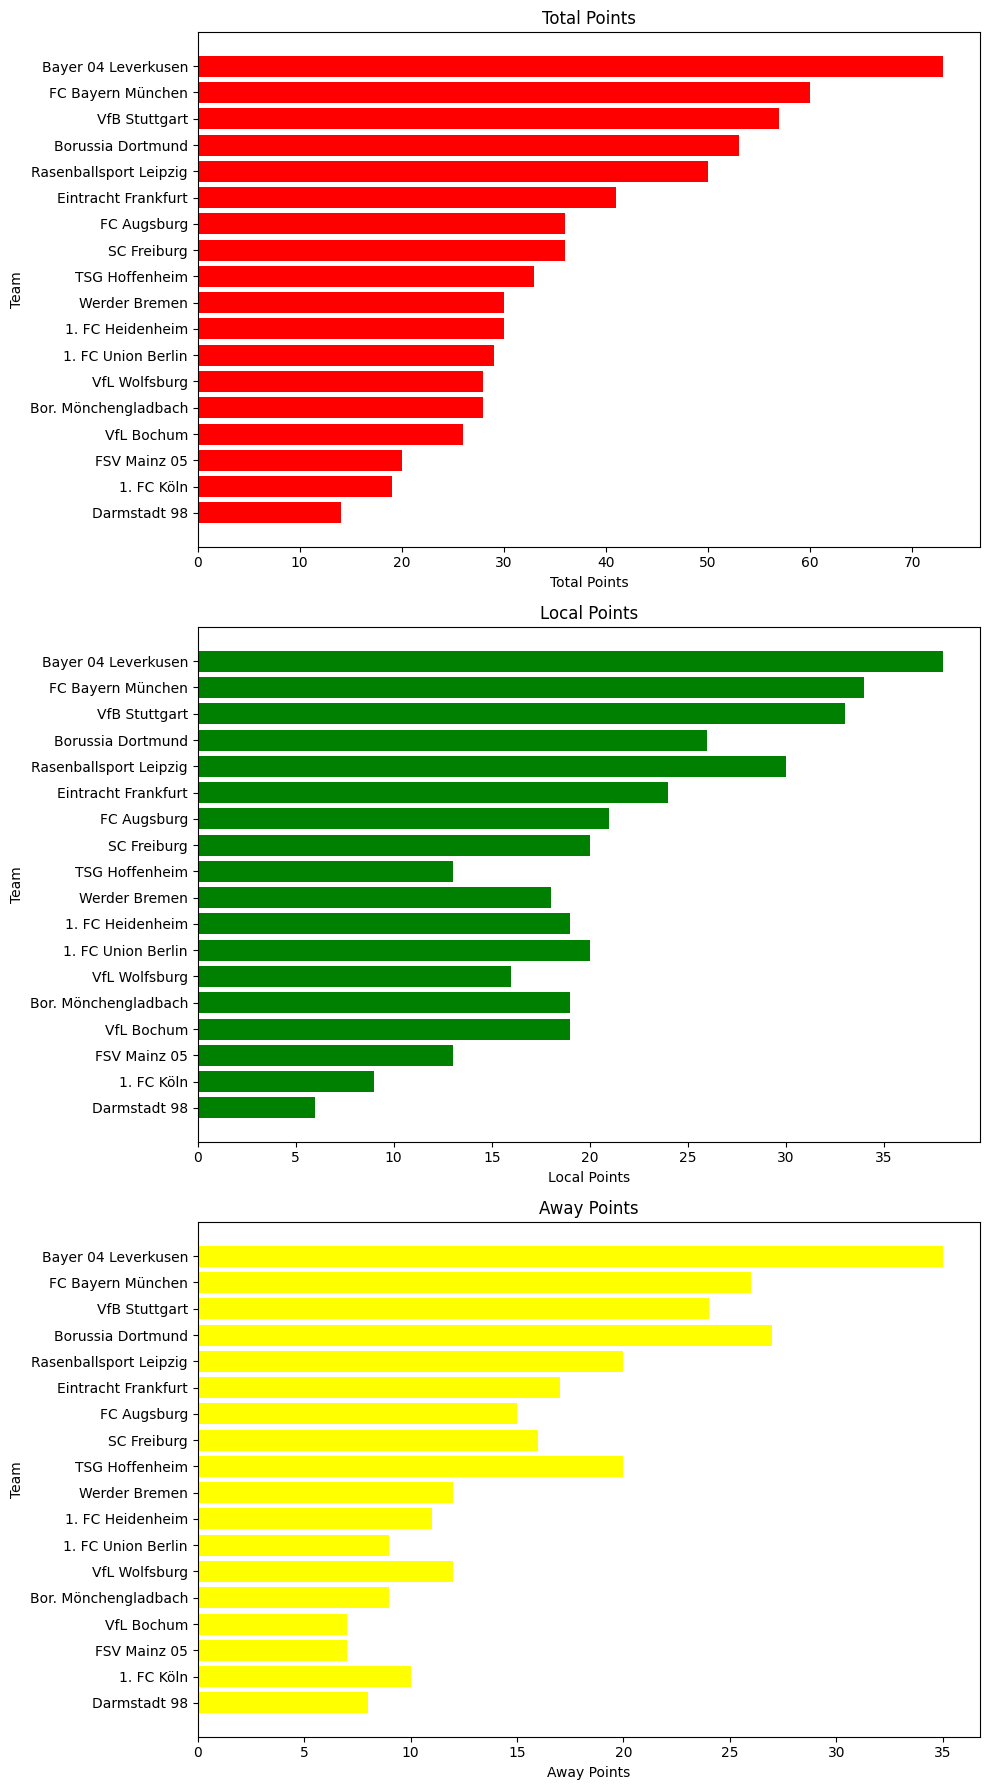

In [63]:
# Create separate subplots for each category
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# Plot Total Points
ax[0].barh(points_table_df['Team'], points_table_df['Total Points'], color='red')
ax[0].set_xlabel('Total Points')
ax[0].set_ylabel('Team')
ax[0].set_title('Total Points')

# Plot Local Points
ax[1].barh(points_table_df['Team'], points_table_df['points-Local'], color='green')
ax[1].set_xlabel('Local Points')
ax[1].set_ylabel('Team')
ax[1].set_title('Local Points')

# Plot Away Points
ax[2].barh(points_table_df['Team'], points_table_df['points-Away'], color='yellow')
ax[2].set_xlabel('Away Points')
ax[2].set_ylabel('Team')
ax[2].set_title('Away Points')

plt.tight_layout()
plt.show()

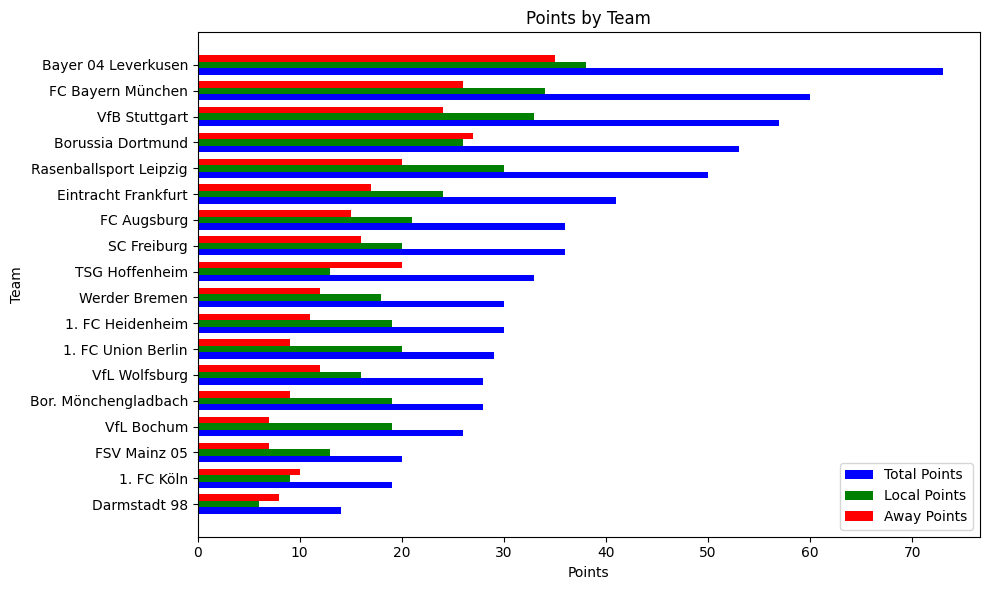

In [64]:
import numpy as np

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
index = np.arange(len(points_table_df))

# Plot
plt.figure(figsize=(10, 6))

plt.barh(index, points_table_df['Total Points'], bar_width, color='blue', label='Total Points')
plt.barh(index + bar_width, points_table_df['points-Local'], bar_width, color='green', label='Local Points')
plt.barh(index + 2*bar_width, points_table_df['points-Away'], bar_width, color='red', label='Away Points')

# Labeling
plt.xlabel('Points')
plt.ylabel('Team')
plt.title('Points by Team')
plt.xticks()
plt.yticks(index + bar_width, points_table_df['Team'])
plt.legend()

plt.tight_layout()
plt.show()

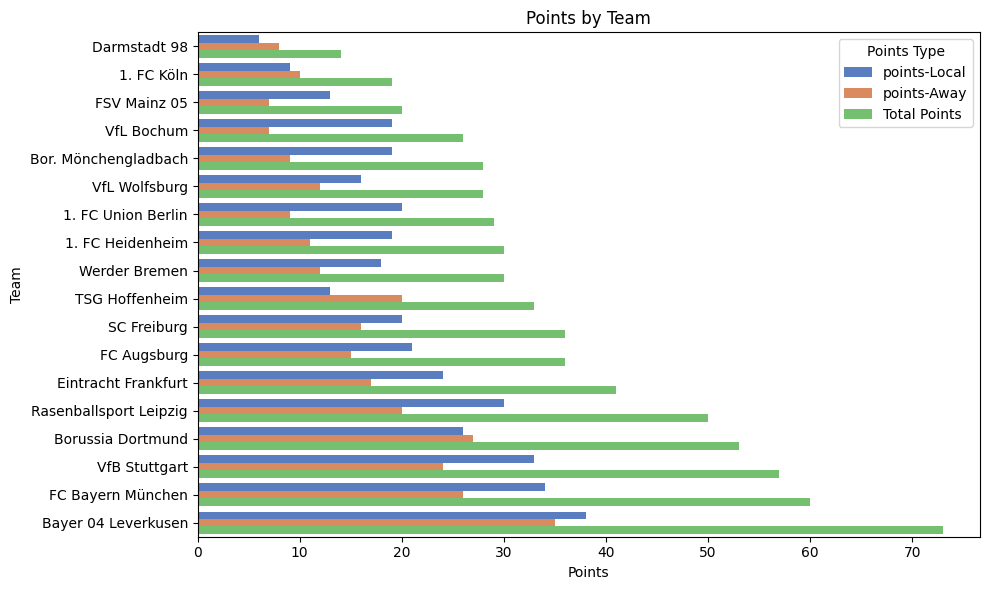

In [65]:
import seaborn as sns

# points_table_df = pd.DataFrame(data)

# Melt the DataFrame to make it suitable for Seaborn's barplot
points_table_melted = points_table_df.melt(id_vars='Team', var_name='Points Type', value_name='Points')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=points_table_melted, x='Points', y='Team', hue='Points Type', palette='muted')
plt.title('Points by Team')
plt.xlabel('Points')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

In [66]:
import plotly.graph_objects as go
import plotly.io as pio

# Create traces for each points type
total_trace = go.Bar(y=points_table_df['Team'], x=points_table_df['Total Points'], name='Total Points', orientation='h')
local_trace = go.Bar(y=points_table_df['Team'], x=points_table_df['points-Local'], name='Local Points', orientation='h')
away_trace = go.Bar(y=points_table_df['Team'], x=points_table_df['points-Away'], name='Away Points', orientation='h')

# Create the figure and plot
fig = go.Figure(data=[total_trace, local_trace, away_trace])
fig.update_layout(title='Points by Team',
                  xaxis_title='Points',
                  yaxis_title='Team',
                  barmode='stack')


fig.show(renderer='notebook_connected')

# Save the plot as an HTML file
# fig.write_html('points_by_team_plot.html')


In [67]:

pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']